In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
os.listdir(".")

['.config', 'COVID-19 Activity.csv', 'sample_data']

In [ ]:
df = pd.read_csv("COVID-19 Activity.csv")
df.REPORT_DATE = pd.to_datetime(df.REPORT_DATE)
df.dropna(inplace=True)
df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,0,Pickens,Alabama,2020-01-22,America,New York Times,0,1107,USA,United States,US,0.0,0.0
1,0,Pickens,Alabama,2020-01-23,America,New York Times,0,1107,USA,United States,US,0.0,0.0
2,0,Pickens,Alabama,2020-01-24,America,New York Times,0,1107,USA,United States,US,0.0,0.0
3,0,Pickens,Alabama,2020-01-25,America,New York Times,0,1107,USA,United States,US,0.0,0.0
4,0,Pickens,Alabama,2020-01-26,America,New York Times,0,1107,USA,United States,US,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34532,3311,Hernando,Florida,2020-10-10,America,New York Times,0,12053,USA,United States,US,0.0,146.0
34533,3348,Hernando,Florida,2020-10-11,America,New York Times,2,12053,USA,United States,US,37.0,148.0
34534,3362,Hernando,Florida,2020-10-12,America,New York Times,0,12053,USA,United States,US,14.0,148.0
34535,3352,Hernando,Florida,2020-10-13,America,New York Times,1,12053,USA,United States,US,-10.0,149.0


In [ ]:
df.describe()
df.to_csv("table.csv")

In [ ]:
date_range = pd.to_datetime(df.REPORT_DATE.unique()).sort_values()
date_range

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06'],
              dtype='datetime64[ns]', length=716, freq=None)

In [ ]:
provinces = df.PROVINCE_STATE_NAME.unique()
provinces

array(['Alabama', 'New York', 'Wisconsin', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Florida'], dtype=object)

In [ ]:
ri = np.random.randint(len(provinces))
rp = provinces[ri]
rp

'Colorado'

In [ ]:
rdf = df.loc[df.PROVINCE_STATE_NAME == rp, :].groupby("REPORT_DATE").sum()
rdf

,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
REPORT_DATE,,,,,
2020-01-22,0,0,32160,0.0,0.0
2020-01-23,0,0,32160,0.0,0.0
2020-01-24,0,0,32160,0.0,0.0
2020-01-25,0,0,32160,0.0,0.0
2020-01-26,0,0,32160,0.0,0.0
...,...,...,...,...,...
2022-01-02,108034,2,24139,879.0,1193.0
2022-01-03,110157,0,24139,2123.0,1193.0
2022-01-04,111346,1,24139,1189.0,1194.0


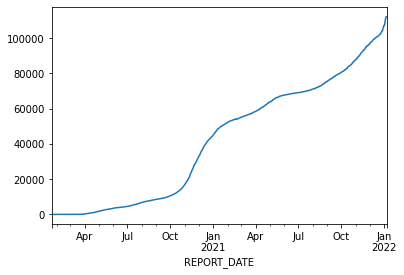

In [ ]:

rdf.PEOPLE_POSITIVE_CASES_COUNT.plot()
plt.savefig('people_positive_cases.png')

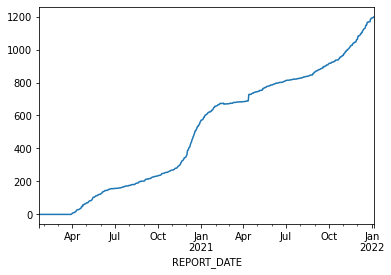

In [ ]:
rdf.PEOPLE_DEATH_COUNT.plot()
plt.savefig('people_death_cases.png')

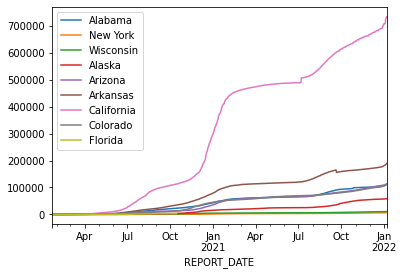

In [ ]:
for p in provinces:
  _df = df.loc[df.PROVINCE_STATE_NAME == p, :].groupby("REPORT_DATE").sum()
  
  _df.PEOPLE_POSITIVE_CASES_COUNT.plot(label=p)
plt.legend()
plt.savefig('report.png')